In [5]:
# !pip install yellowbrick

In [7]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler

# linkage : 계층형 군집분석, dendrogram : 계층구조 나무, cluster : linkage로부터 얻은 값으로 군집 생성
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster

# 군집방법
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN

#실루엣 계수 산출 및 시각화
from sklearn.metrics import silhouette_samples,silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

import warnings 
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rc("axes",unicode_minus = False) 

In [8]:
df_raw = pd.read_csv("./실습화일/2. Big Data 분석/직무능력평가.csv", encoding='euc-kr')

In [9]:
scaler = StandardScaler()
df_raw_scaled = scaler.fit_transform(df_raw)

df_raw_y = df_raw_scaled[:,0]
df_raw_x = df_raw_scaled[:,1:]

# 계층적 군집분석 (Hierarchical)

In [10]:
Z_ward =linkage(df_raw_x, method = 'ward', metric='euclidean')
Z_average =linkage(df_raw_x, method = 'average', metric='euclidean')
Z_Minkowski =linkage(df_raw_x, method = 'average', metric='minkowski')
Z_ward

array([[14.        , 26.        ,  0.52156235,  2.        ],
       [ 3.        , 27.        ,  0.65700712,  2.        ],
       [ 9.        , 22.        ,  0.84734214,  2.        ],
       [16.        , 28.        ,  1.13863458,  2.        ],
       [ 6.        ,  7.        ,  1.17063718,  2.        ],
       [ 1.        , 21.        ,  1.22298201,  2.        ],
       [11.        , 32.        ,  1.31728974,  3.        ],
       [ 2.        ,  4.        ,  1.33423955,  2.        ],
       [24.        , 36.        ,  1.47235046,  4.        ],
       [30.        , 37.        ,  1.65014418,  4.        ],
       [18.        , 35.        ,  1.78970024,  3.        ],
       [29.        , 34.        ,  1.8539993 ,  3.        ],
       [10.        , 12.        ,  1.88477465,  2.        ],
       [31.        , 38.        ,  1.94570646,  6.        ],
       [25.        , 33.        ,  2.11914806,  3.        ],
       [ 5.        , 42.        ,  2.16582648,  3.        ],
       [17.        , 19.

Text(0, 0.5, 'sample index')

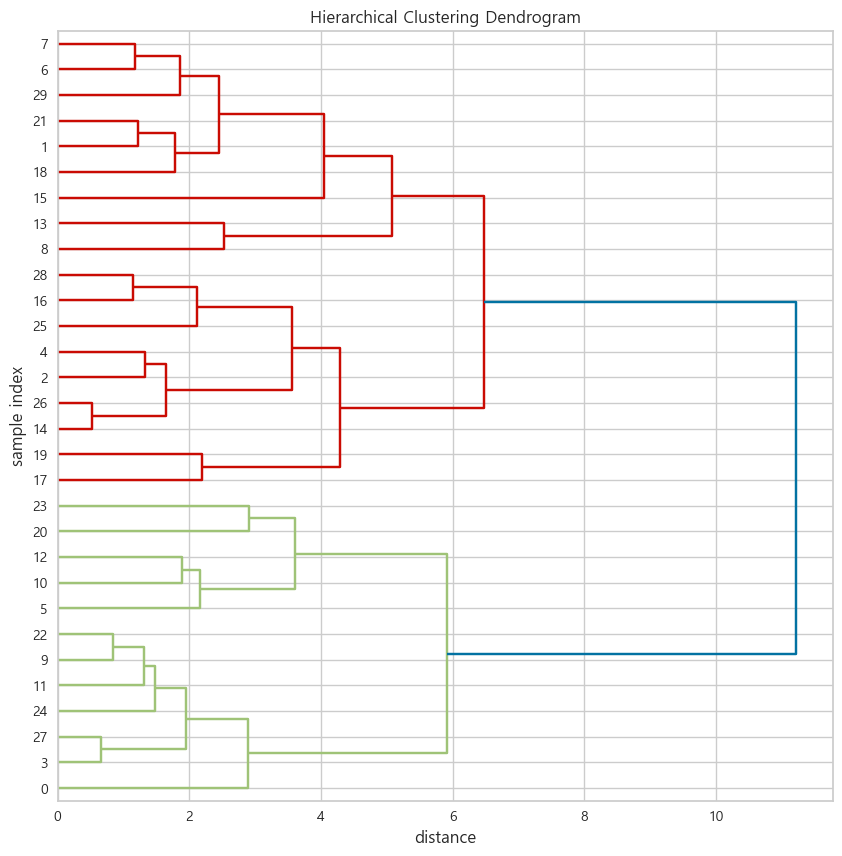

In [11]:
# !pip install --upgrade matplotlib
# import matplotlib.pyplot as plt

# Dendrogram :  계층적 군집화를 트리 구조로 나타낸 그림(오른쪽)을 덴드로그램dendrogram이라 한다.

plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
dendrogram(Z_ward, leaf_font_size=10, orientation='right')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('distance')
plt.ylabel('sample index')


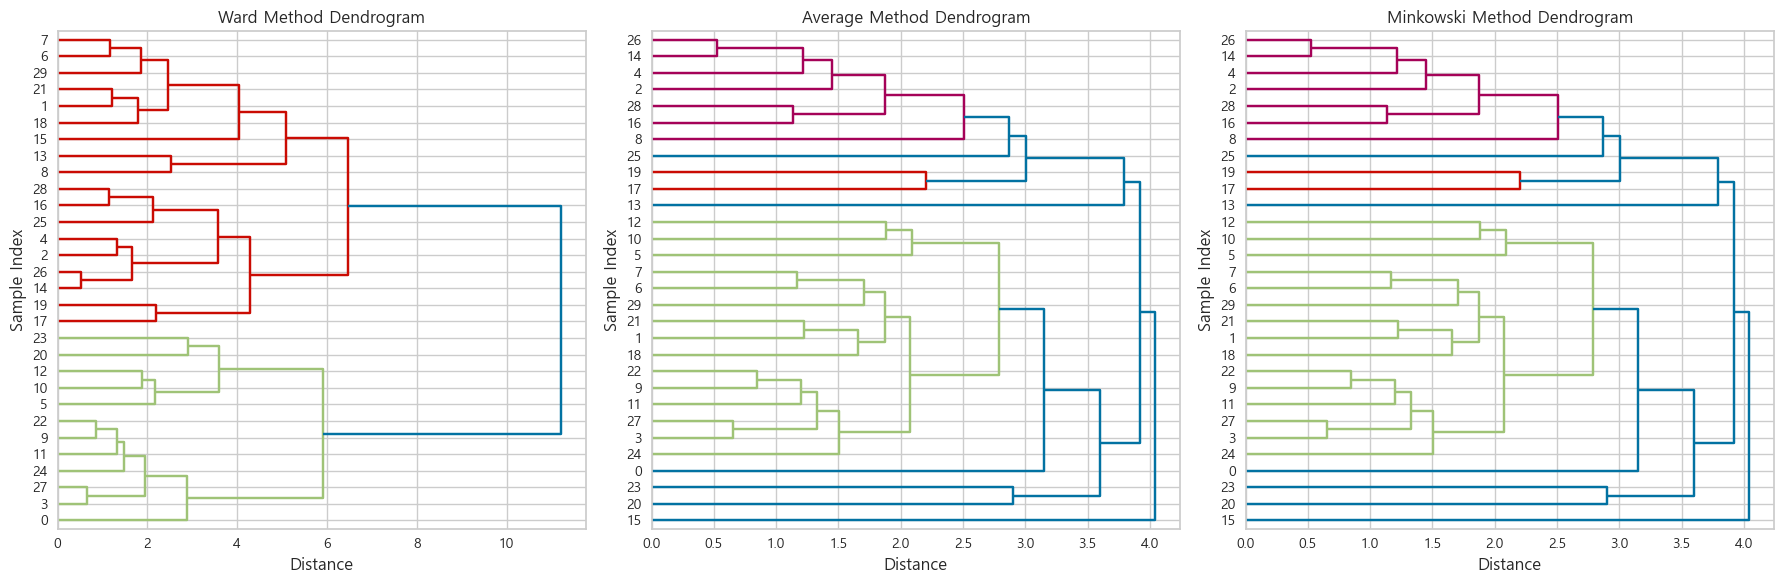

In [12]:
# 각각의 linkage 결과를 생성
Z_ward = linkage(df_raw_x, method='ward', metric='euclidean')
Z_average = linkage(df_raw_x, method='average', metric='euclidean')
Z_Minkowski = linkage(df_raw_x, method='average', metric='minkowski')

# 3개의 그래프를 나란히 출력하기 위해 1행 3열의 그림 영역 생성
plt.figure(figsize=(18, 6))

# 첫 번째 그래프
plt.subplot(131)
dendrogram(Z_ward, leaf_font_size=10, orientation='right')
plt.title('Ward Method Dendrogram')
plt.xlabel('Distance')
plt.ylabel('Sample Index')

# 두 번째 그래프
plt.subplot(132)
dendrogram(Z_average, leaf_font_size=10, orientation='right')
plt.title('Average Method Dendrogram')
plt.xlabel('Distance')
plt.ylabel('Sample Index')

# 세 번째 그래프
plt.subplot(133)
dendrogram(Z_Minkowski, leaf_font_size=10, orientation='right')
plt.title('Minkowski Method Dendrogram')
plt.xlabel('Distance')
plt.ylabel('Sample Index')

plt.tight_layout()  # 그래프들이 서로 겹치지 않도록 자동 조정
plt.show()


In [13]:
cluster_hierarchical = fcluster(Z = Z_ward, t=5, criterion='distance')
df_raw['ClusterHierarchical']=cluster_hierarchical
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical
0,43,51,30,39,61,92,45,1
1,63,64,51,54,63,73,47,5
2,71,70,68,69,76,86,48,3
3,61,63,45,47,54,84,35,1
4,81,78,56,66,71,83,47,3


In [14]:
ds_summary_hc = df_raw.groupby('ClusterHierarchical').agg(['min','mean','max'])
level0= ds_summary_hc.columns.get_level_values(0)
level1= ds_summary_hc.columns.get_level_values(1)
ds_summary_hc.columns = level0+'_'+level1
ds_summary_hc.reset_index(inplace = True)
ds_summary_hc.round(3)

,ClusterHierarchical,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,1,43,57.429,67,51,58.857,66,30,43.571,52,...,50,51,59.429,66,74,81.143,92,33,38.571,45
1,2,40,53.200,69,37,49.400,62,33,46.800,57,...,58,43,52.000,58,49,60.000,67,25,35.000,49
2,3,50,71.889,85,58,73.889,85,54,63.333,71,...,75,55,74.333,88,74,79.000,86,46,54.667,72
3,4,68,70.000,72,82,82.500,83,72,77.500,83,...,67,59,65.000,71,77,80.000,83,31,33.000,35
4,5,58,69.143,82,61,72.714,90,39,47.143,52,...,72,60,66.286,75,54,72.000,85,35,40.714,47


<Axes: title={'center': 'EVAL'}, xlabel='ClusterHierarchical'>

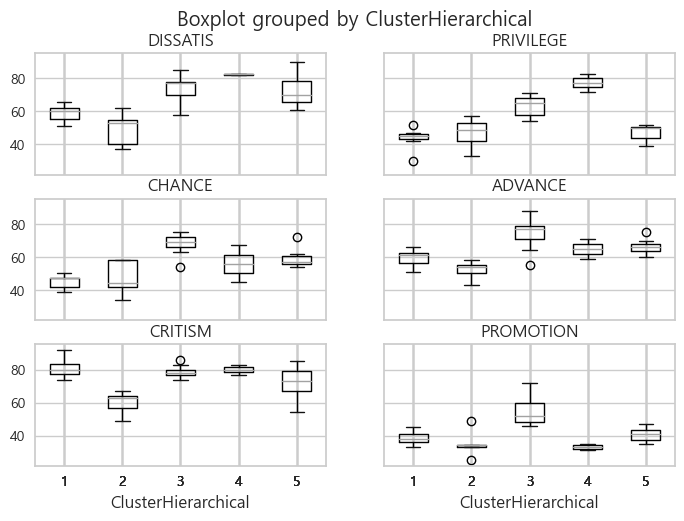

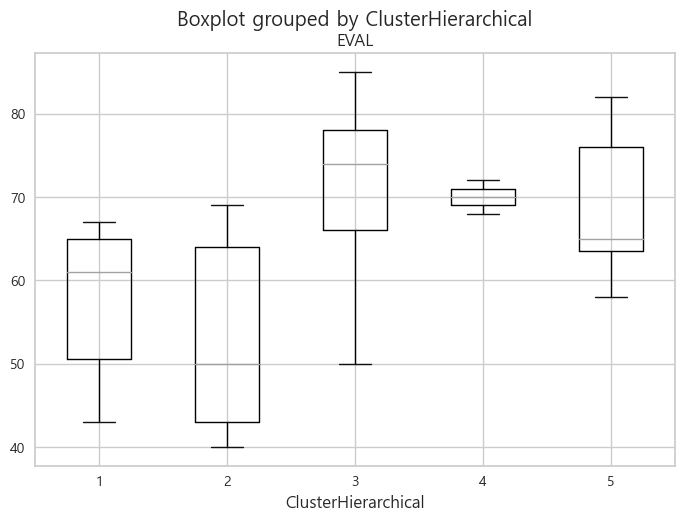

In [15]:
df_raw.boxplot(column=['DISSATIS','PRIVILEGE','CHANCE','ADVANCE','CRITISM','PROMOTION'], by='ClusterHierarchical')
df_raw.boxplot(column=['EVAL'],by='ClusterHierarchical')

# K-MEANS (K-평균)

In [16]:
n_iter_cluster =15
cluster_range = [i+1 for i in range(n_iter_cluster)]
clus_error=[]
for v_n_clus in cluster_range:
    clus= KMeans(v_n_clus)
    clus.fit(df_raw_x)
    
    clus_error.append(clus.inertia_)
ds_error =pd.DataFrame({'NumberofCluster':cluster_range,'Error':clus_error})
ds_error

,NumberofCluster,Error
0,1,180.000000
1,2,114.082503
2,3,93.353633
3,4,80.426450
4,5,69.024993
5,6,58.823176
6,7,49.834579
7,8,46.281212
8,9,37.944717
9,10,34.125267


Text(0, 0.5, 'Sum of squared distance')

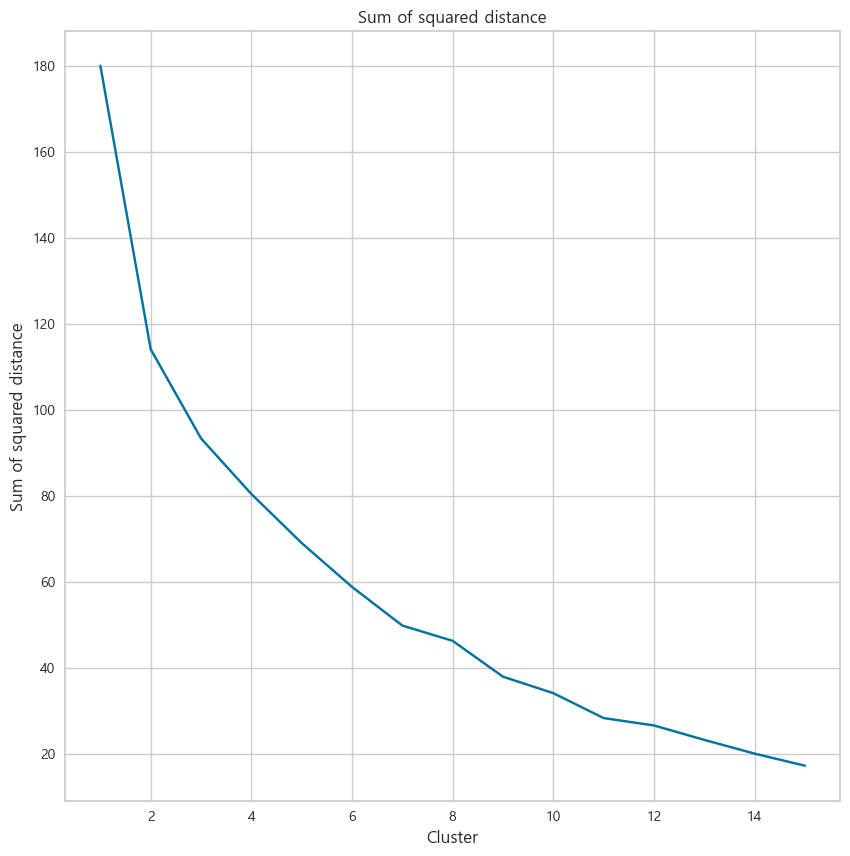

In [17]:
plt.figure(figsize=(10,10))
plt.plot(ds_error['NumberofCluster'],ds_error['Error'])
plt.title('Sum of squared distance')
plt.xlabel('Cluster')
plt.ylabel('Sum of squared distance')

군집 개수가 증가함에 따라 error 가 줄어들지만 과적합 문제가 있는데 무슨 의미가 있을까?

In [18]:
clus=KMeans(5)
# 군집할당, 라벨링 결정
clus.fit(df_raw_x)
# K-means 군집화는 각 데이터 포인트를 0부터 K-1까지의 정수로 레이블링하기 때문에 1을 더한다
cluster_kmeans=[i+1 for i in clus.labels_]
df_raw['ClusterKMeans'] = cluster_kmeans
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical,ClusterKMeans
0,43,51,30,39,61,92,45,1,3
1,63,64,51,54,63,73,47,5,3
2,71,70,68,69,76,86,48,3,1
3,61,63,45,47,54,84,35,1,3
4,81,78,56,66,71,83,47,3,1


In [19]:
ds_summary_km =df_raw.drop('ClusterHierarchical', axis=1, inplace =False).groupby('ClusterKMeans').agg(['min','mean','max'])
level0=ds_summary_km.columns.get_level_values(0)
level1=ds_summary_km.columns.get_level_values(1)
ds_summary_km.columns = level0+'_'+level1
ds_summary_km.reset_index(inplace =True)
ds_summary_km.round(3)

,ClusterKMeans,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,1,65,74.625,85,60,75.875,85,54,62.750,71,...,75,55,75.625,88,74,79.125,86,46,55.000,72
1,2,40,50.500,69,37,48.500,62,33,45.250,57,...,58,43,50.500,55,49,58.250,64,25,35.250,49
2,3,43,61.267,82,51,62.800,82,30,47.067,68,...,62,51,62.800,75,66,77.533,92,33,40.333,52
3,4,81,81.000,81,90,90.000,90,50,50.000,50,...,72,60,60.000,60,54,54.000,54,36,36.000,36
4,5,68,70.000,72,82,82.500,83,72,77.500,83,...,67,59,65.000,71,77,80.000,83,31,33.000,35


<Axes: title={'center': 'EVAL'}, xlabel='ClusterKMeans'>

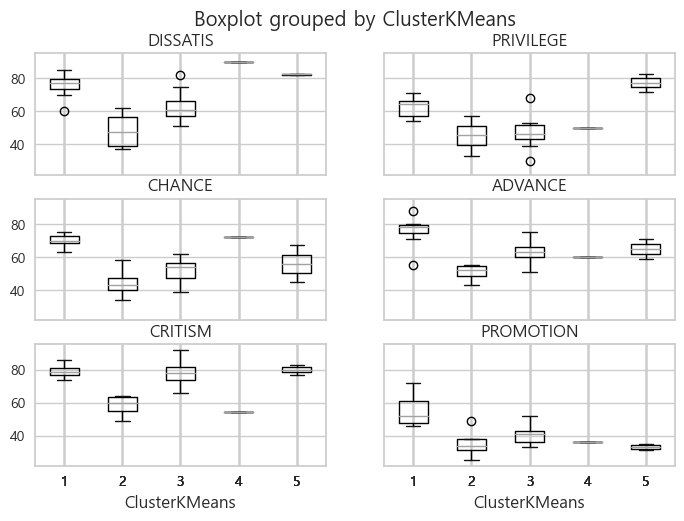

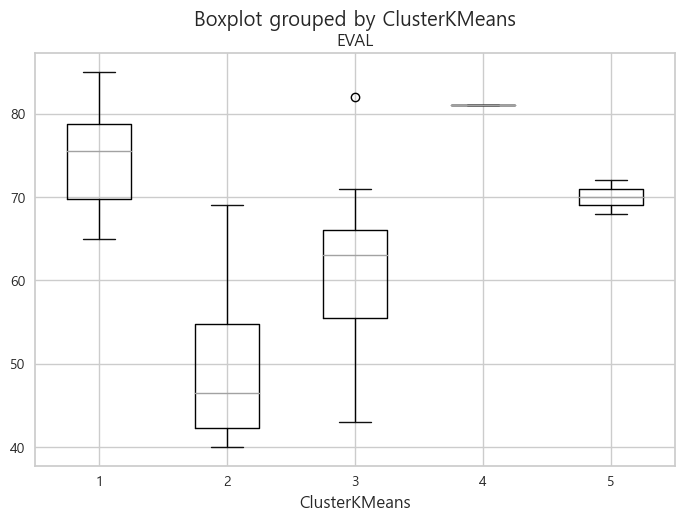

In [20]:
df_raw.boxplot(column=['DISSATIS','PRIVILEGE','CHANCE','ADVANCE','CRITISM','PROMOTION'], by='ClusterKMeans')
df_raw.boxplot(column=['EVAL'],by='ClusterKMeans')

In [21]:
cls_h = AgglomerativeClustering(n_clusters=3).fit_predict(df_raw_x)
sil_score =silhouette_score(df_raw_x,cls_h,metric='euclidean')
print('계층형(군집수=3) 실루엣계수 =',format(round(sil_score,3)))

cls_h = AgglomerativeClustering(n_clusters=4).fit_predict(df_raw_x)
sil_score =silhouette_score(df_raw_x,cls_h,metric='euclidean')
print('계층형(군집수=4) 실루엣계수 =',format(round(sil_score,3)))

계층형(군집수=3) 실루엣계수 = 0.187
계층형(군집수=4) 실루엣계수 = 0.198


In [22]:
cls_k = KMeans(3).fit_predict(df_raw_x)
sil_score =silhouette_score(df_raw_x,cls_k)
print('k-평균(군집수=3) 실루엣계수 =',format(round(sil_score,3)))

cls_k = KMeans(4).fit_predict(df_raw_x)
sil_score =silhouette_score(df_raw_x,cls_k)
print('k-평균(군집수=4) 실루엣계수 =',format(round(sil_score,4)))

k-평균(군집수=3) 실루엣계수 = 0.239
k-평균(군집수=4) 실루엣계수 = 0.2592


## 실루엣 계수가 높을수록 (1에 가까울수록) 군집이 효율적으로 형성되었다고 판단.

- 군집 개수는 계층형은 4개,  K-평균은 3개가 적절해보임

- K-평균 군집분석의 실루엣 계수는 실행할때마다 값이 달라질 수 있음


## +추가) 전체 실루엣 계수 뿐만 아니라 개별 군집의 실루엣 계수의 평균값의 편차가 작은 게 좋다

- 1에 가까운 값 : 근처의 군집과의 거리가 멀다는 의미
- 0에 가까운 값 : 근처의 군집과의 거리가 가깝다는 의미
- 음수 값 : 원래 A라는 군집내의 데이터인데 다른 B 군집에 할당됬다는 의미

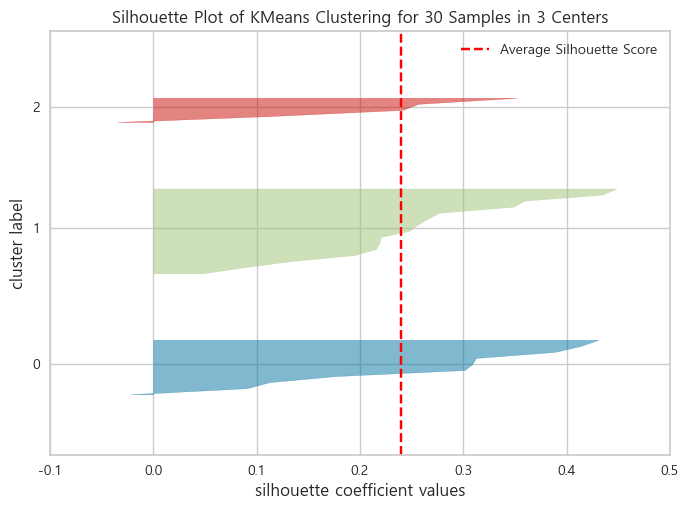

실루엣계수 = 0.2399


In [39]:
clus =KMeans(3)
graph_sil =SilhouetteVisualizer(clus,colors='yellowbrick')
graph_sil.fit(df_raw_x)
graph_sil.show()
print('실루엣계수 =',format(round(graph_sil.silhouette_score_,4)))

In [40]:
clus = KMeans(3)
clus.fit(df_raw_x)

# 각 데이터 포인트의 실루엣 계수 계산
silhouette_scores = silhouette_samples(df_raw_x, clus.labels_)

# 각 데이터 포인트의 실루엣 계수를 해당 군집으로 그룹화
cluster_silhouette_scores = {}
for i in range(len(clus.labels_)):
    label = clus.labels_[i]
    if label not in cluster_silhouette_scores:
        cluster_silhouette_scores[label] = []
    cluster_silhouette_scores[label].append(silhouette_scores[i])

# 군집별 실루엣 계수 출력
for label, scores in cluster_silhouette_scores.items():
    print(f"군집 {label+1}의 평균 실루엣 계수:{np.mean(scores)}")

군집 3의 평균 실루엣 계수:0.33024802192993163
군집 2의 평균 실루엣 계수:0.1752333442675185
군집 1의 평균 실루엣 계수:0.21164604853981028


# DBSCAN 군집분석

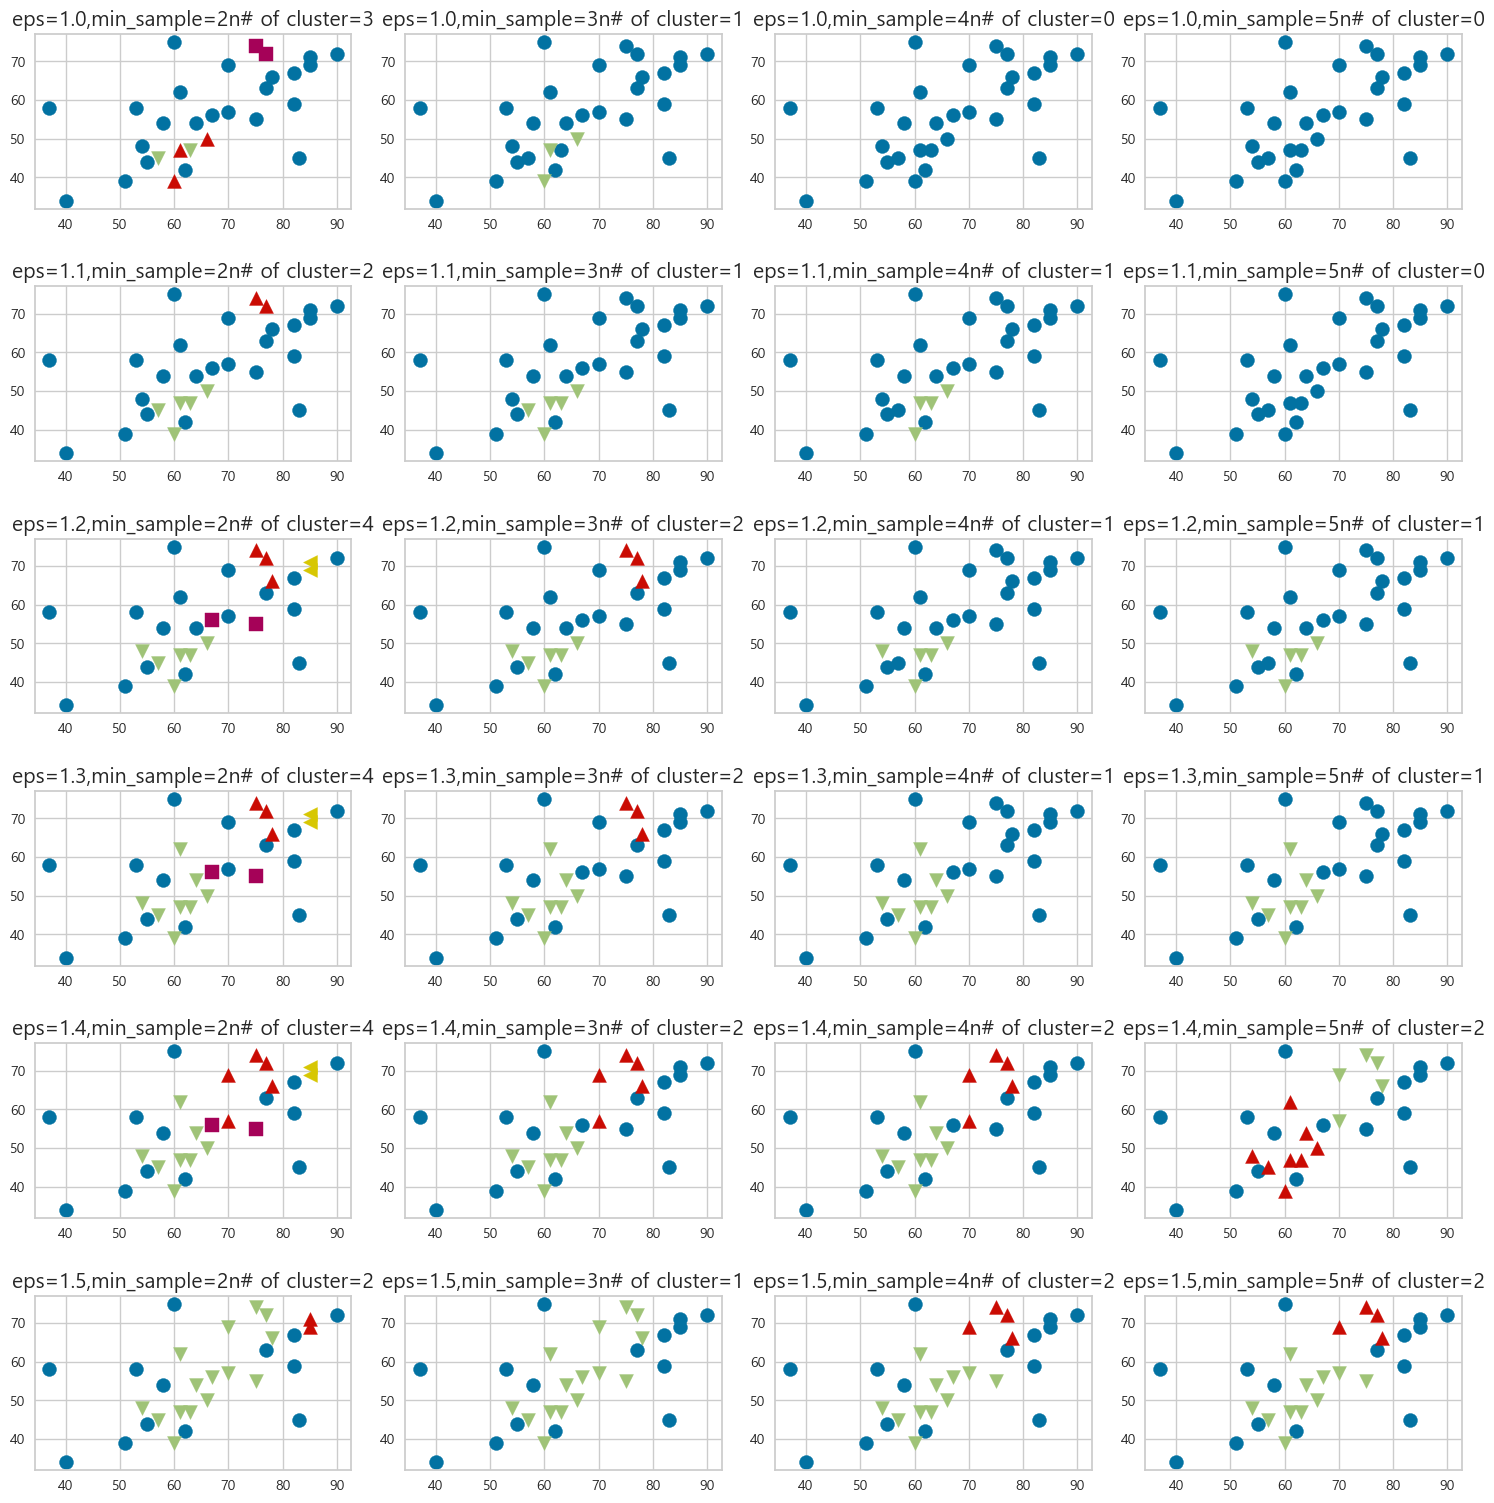

In [24]:
X=df_raw['DISSATIS']
Y=df_raw['CHANCE']
markers = ['o','v','^','s','<','>','p','D']

# eps : 거리, min_sample : 최소 자료 수
# 거리가 길고 최소 자료 수가 적으면 군집이 여러개 생성
# 거리가 짧고 최소 자료수가 많으면 군집이 생성되지 않음

para_eps = [k/10 for k in range(10,16,1)]
para_min_sample =[2,3,4,5]
fig,axes =plt.subplots(len(para_eps),len(para_min_sample),figsize=(15,15))
fig.tight_layout(w_pad =1, h_pad=3)

for i,eps in enumerate(para_eps):
    for j, min_sample in enumerate(para_min_sample):
        dbscan=DBSCAN(min_samples=min_sample,eps=eps)
        clusters=dbscan.fit_predict(df_raw_x)
        clusters=clusters +1
        for (n_clus,clus) in enumerate(range(min(clusters),max(clusters)+1, 1)):
            axes[i,j].scatter(X[clusters ==clus],Y[clusters ==clus], marker=markers[n_clus],s=100)
            axes[i,j].set_title('eps='+str(eps)+',min_sample='+str(min_sample)+'n# of cluster='+str(max(clusters)),fontsize=15)
            

In [25]:
dbscan =DBSCAN(eps=1.4,min_samples=2).fit(df_raw_x)
cluster_dbscan=dbscan.labels_

for (i,val) in enumerate(cluster_dbscan):
    if val < 0:
        cluster_dbscan[i] =0
    else:
        cluster_dbscan[i] =0
        cluster_dbscan[i] = cluster_dbscan[i]+1
df_raw['ClusterDBScan']=cluster_dbscan
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical,ClusterKMeans,ClusterDBScan
0,43,51,30,39,61,92,45,1,3,0
1,63,64,51,54,63,73,47,5,3,1
2,71,70,68,69,76,86,48,3,1,1
3,61,63,45,47,54,84,35,1,3,1
4,81,78,56,66,71,83,47,3,1,1


In [41]:
ds_summary_db = df_raw.drop(['ClusterHierarchical', 'ClusterKMeans'], axis =1, inplace=False).groupby('ClusterDBScan').agg(['min','mean','max'])
level0 = ds_summary_db.columns.get_level_values(0)
level1 = ds_summary_db.columns.get_level_values(1)
ds_summary_db.columns = level0+'_'+level1
ds_summary_db.reset_index(inplace= True)
ds_summary_db.round(3)

,ClusterDBScan,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,0,40,61.000,82,37,63.846,90,30,54.385,83,...,75,43,60.154,88,49,70.615,92,25,41.923,72
1,1,48,67.412,85,54,68.706,85,42,52.176,71,...,74,51,68.059,80,66,77.941,86,33,43.706,63
